In [2]:
# The usual ramble.
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.mpl_style', 'default')
plt.rcParams['figure.figsize'] = (15,10)

In [3]:
# let read a new dataset
complaints = pd.read_csv('../data/311-service-requests.csv', low_memory=False)
complaints.head(3)

Unique Key            Created Date             Closed Date Agency  \
0    26589651  10/31/2013 02:08:41 AM                     NaN   NYPD   
1    26593698  10/31/2013 02:01:04 AM                     NaN   NYPD   
2    26594139  10/31/2013 02:00:24 AM  10/31/2013 02:40:32 AM   NYPD   

                       Agency Name           Complaint Type  \
0  New York City Police Department  Noise - Street/Sidewalk   
1  New York City Police Department          Illegal Parking   
2  New York City Police Department       Noise - Commercial   

                     Descriptor        Location Type Incident Zip  \
0                  Loud Talking      Street/Sidewalk        11432   
1  Commercial Overnight Parking      Street/Sidewalk        11378   
2              Loud Music/Party  Club/Bar/Restaurant        10032   

   Incident Address                    ...                     \
0  90-03 169 STREET                    ...                      
1         58 AVENUE                    ...                      
2     4060 BROADWAY                    ...                      

  Bridge Highway Name Bridge Highway Direction Road Ramp  \
0                 NaN                      NaN       NaN   
1                 NaN                      NaN       NaN   
2                 NaN                      NaN       NaN   

  Bridge Highway Segment Garage Lot Name Ferry Direction Ferry Terminal Name  \
0                    NaN             NaN             NaN                 NaN   
1                    NaN             NaN             NaN                 NaN   
2                    NaN             NaN             NaN                 NaN   

    Latitude  Longitude                                  Location  
0  40.708275 -73.791604   (40.70827532593202, -73.79160395779721)  
1  40.721041 -73.909453  (40.721040535628305, -73.90945306791765)  
2  40.843330 -73.939144   (40.84332975466513, -73.93914371913482)  

[3 rows x 52 columns]

In [4]:
#pd.value_counts(pd.unique(complaints['Complaint Type'])) # Shows all the unique complaint types

#pd.value_counts(complaints.groupby('Complaint Type').nunique())

In [6]:
complaints.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'School Name', 'School Number',
       'School Region', 'School Code', 'School Phone Number', 'School Address',
       'School City', 'School State', 'School Zip', 'School Not Found',
       'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough',
       'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Garage Lot Name', 'Ferry Direction', 'Ferry Termina

In [9]:
complaints[:5]['Complaint Type']

0    Noise - Street/Sidewalk
1            Illegal Parking
2         Noise - Commercial
3            Noise - Vehicle
4                     Rodent
Name: Complaint Type, dtype: object

In [6]:
complaints['Complaint Type'].count()

111069

In [52]:
complaints[['Complaint Type', 'Borough']] #phew, long list - lets get them and also their area - this will be long as well

Complaint Type        Borough
0        Noise - Street/Sidewalk         QUEENS
1                Illegal Parking         QUEENS
2             Noise - Commercial      MANHATTAN
3                Noise - Vehicle      MANHATTAN
4                         Rodent      MANHATTAN
5             Noise - Commercial         QUEENS
6               Blocked Driveway         QUEENS
7             Noise - Commercial         QUEENS
8             Noise - Commercial      MANHATTAN
9             Noise - Commercial       BROOKLYN
10      Noise - House of Worship       BROOKLYN
11            Noise - Commercial      MANHATTAN
12               Illegal Parking      MANHATTAN
13               Noise - Vehicle          BRONX
14                        Rodent       BROOKLYN
15      Noise - House of Worship      MANHATTAN
16       Noise - Street/Sidewalk  STATEN ISLAND
17               Illegal Parking       BROOKLYN
18        Street Light Condition       BROOKLYN
19            Noise - Commercial      MANHATTAN
20      Noise - House of Worship       BROOKLYN
21            Noise - Commercial      MANHATTAN
22               Noise - Vehicle         QUEENS
23            Noise - Commercial       BROOKLYN
24              Blocked Driveway  STATEN ISLAND
25       Noise - Street/Sidewalk  STATEN ISLAND
26        Street Light Condition       BROOKLYN
27          Harboring Bees/Wasps      MANHATTAN
28       Noise - Street/Sidewalk      MANHATTAN
29        Street Light Condition  STATEN ISLAND
...                          ...            ...
111039        Noise - Commercial      MANHATTAN
111040        Noise - Commercial      MANHATTAN
111041                     Noise       BROOKLYN
111042   Noise - Street/Sidewalk      MANHATTAN
111043        Noise - Commercial       BROOKLYN
111044   Noise - Street/Sidewalk      MANHATTAN
111045              Water System      MANHATTAN
111046                     Noise       BROOKLYN
111047           Illegal Parking         QUEENS
111048   Noise - Street/Sidewalk      MANHATTAN
111049        Noise - Commercial       BROOKLYN
111050                     Noise      MANHATTAN
111051        Noise - Commercial      MANHATTAN
111052              Water System      MANHATTAN
111053         Derelict Vehicles         QUEENS
111054   Noise - Street/Sidewalk       BROOKLYN
111055        Noise - Commercial       BROOKLYN
111056     Street Sign - Missing         QUEENS
111057                     Noise      MANHATTAN
111058        Noise - Commercial       BROOKLYN
111059   Noise - Street/Sidewalk      MANHATTAN
111060                     Noise      MANHATTAN
111061        Noise - Commercial         QUEENS
111062              Water System      MANHATTAN
111063              Water System      MANHATTAN
111064   Maintenance or Facility       BROOKLYN
111065           Illegal Parking         QUEENS
111066   Noise - Street/Sidewalk      MANHATTAN
111067        Noise - Commercial       BROOKLYN
111068          Blocked Driveway       BROOKLYN

[111069 rows x 2 columns]

In [53]:
complaints[['Complaint Type', 'Borough']][:10] # lets get only the first ten results

Complaint Type    Borough
0  Noise - Street/Sidewalk     QUEENS
1          Illegal Parking     QUEENS
2       Noise - Commercial  MANHATTAN
3          Noise - Vehicle  MANHATTAN
4                   Rodent  MANHATTAN
5       Noise - Commercial     QUEENS
6         Blocked Driveway     QUEENS
7       Noise - Commercial     QUEENS
8       Noise - Commercial  MANHATTAN
9       Noise - Commercial   BROOKLYN

# What's the most complaint type?

In [7]:
complaints['Complaint Type'].value_counts() # hmm so many complaint types

HEATING                                 14200
GENERAL CONSTRUCTION                     7471
Street Light Condition                   7117
DOF Literature Request                   5797
PLUMBING                                 5373
PAINT - PLASTER                          5149
Blocked Driveway                         4590
NONCONST                                 3998
Street Condition                         3473
Illegal Parking                          3343
Noise                                    3321
Traffic Signal Condition                 3145
Dirty Conditions                         2653
Water System                             2636
Noise - Commercial                       2578
ELECTRIC                                 2350
Broken Muni Meter                        2070
Noise - Street/Sidewalk                  1928
Sanitation Condition                     1824
Rodent                                   1632
Sewer                                    1627
Taxi Complaint                    

## THAT'S TOO MANY COMPLAINTS

## We need Top 10 complaints

In [55]:
complaint_counts = complaints['Complaint Type'].value_counts()
complaint_counts[:10]

HEATING                   14200
GENERAL CONSTRUCTION       7471
Street Light Condition     7117
DOF Literature Request     5797
PLUMBING                   5373
PAINT - PLASTER            5149
Blocked Driveway           4590
NONCONST                   3998
Street Condition           3473
Illegal Parking            3343
dtype: int64

## Lets plot them

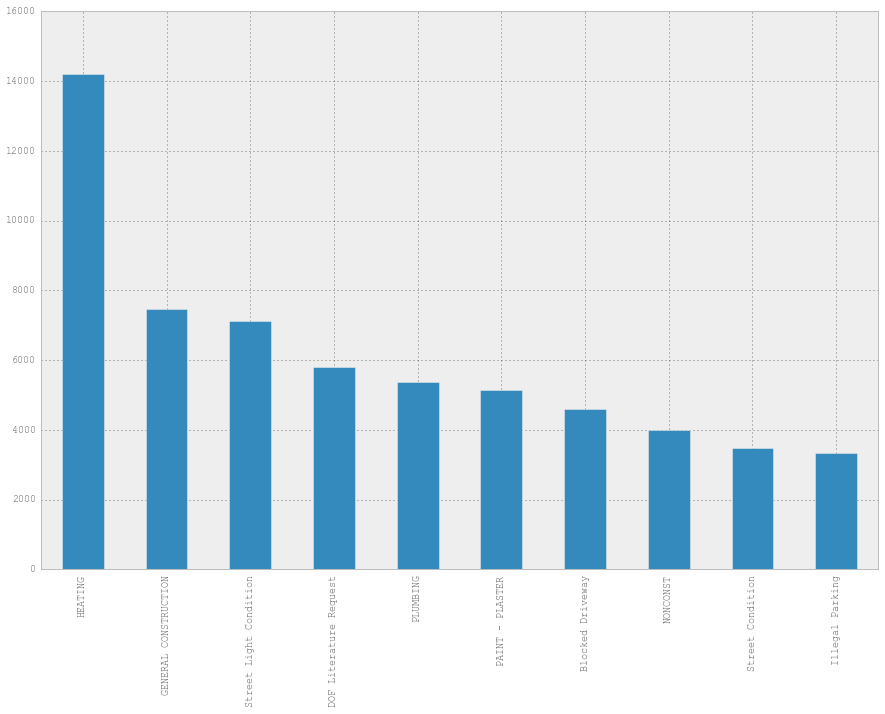

In [56]:
complaint_counts[:10].plot(kind='bar')